In [3]:
pip install --upgrade tensorflow

     |████████████████████████████████| 165.1 MB 65 kB/s s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 15.1 MB 16.6 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
     |████████████████████████████████| 114 kB 21.8 MB/s eta 0:00:01
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any

In [4]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.3.1'

In [5]:
keras.__version__

'2.4.0'

**Play with Keras and TensorFlow on MNIST data first**

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

Create validation data and scale by dividing by 255.0

In [25]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", 
             metrics=["accuracy"])

for our classification problem, we would use a "sigmoid" activation (logistic) in the output layer and the loss
function would be "binary_crossentropy" in the compile component.

In [31]:
history = model.fit(X_train,  y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 855us/step - loss: 0.7173 - accuracy: 0.7639 - val_loss: 0.5089 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 1s 804us/step - loss: 0.4880 - accuracy: 0.8303 - val_loss: 0.4421 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 1s 831us/step - loss: 0.4427 - accuracy: 0.8446 - val_loss: 0.4337 - val_accuracy: 0.8454
Epoch 4/30
1719/1719 [==============================] - 1s 794us/step - loss: 0.4167 - accuracy: 0.8536 - val_loss: 0.4397 - val_accuracy: 0.8466
Epoch 5/30
1719/1719 [==============================] - 1s 791us/step - loss: 0.3970 - accuracy: 0.8605 - val_loss: 0.3780 - val_accuracy: 0.8734
Epoch 6/30
1719/1719 [==============================] - 1s 790us/step - loss: 0.3801 - accuracy: 0.8663 - val_loss: 0.3728 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 1s 793us/step - loss: 0.3662 - accuracy: 0.8716 - val_loss: 0.3813 -

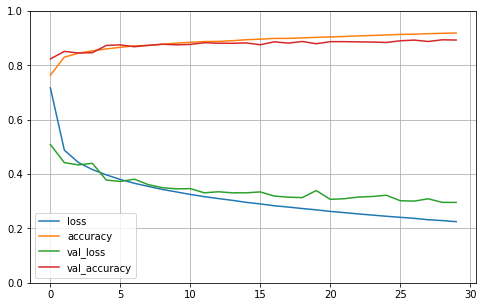

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 932us/step - loss: 57.2043 - accuracy: 0.8612


[57.20426940917969, 0.8611999750137329]

**Complex Model with two hidden layers (deep) and a wide branch for simple rules**


Heng-Tze, Cheng et al., "Wide & Deep Learning for Recommender Systems", Proceedings of the First Workshop on Deep Learning for Recommender Systems (2016): 7-10.

In [51]:
input_ = keras.layers.Input(shape=[28,28])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
modelC = keras.Model(inputs=[input_], outputs=[output])

In [52]:
modelC.compile(loss="mse",
             optimizer=keras.optimizers.SGD(lr=1e-3))

In [53]:
historyC = modelC.fit(X_train,  y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 5.9593 - val_loss: 4.2285
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 4.2643 - val_loss: 3.9891
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 4.1042 - val_loss: 3.8744
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 4.0187 - val_loss: 3.8071
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 3.9589 - val_loss: 3.7796
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 3.9161 - val_loss: 3.7322
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 3.8807 - val_loss: 3.6981
Epoch 8/20
1719/1719 [==============================] - 3s 2ms/step - loss: 3.8518 - val_loss: 3.7299
Epoch 9/20
1719/1719 [==============================] - 3s 2ms/step - loss: 3.8276 - val_loss: 3.6514
Epoch 10/20
1719/1719 [==============================] - 3s 2ms/step - loss: 3.806

In [47]:
X_train.shape

(55000, 28, 28)

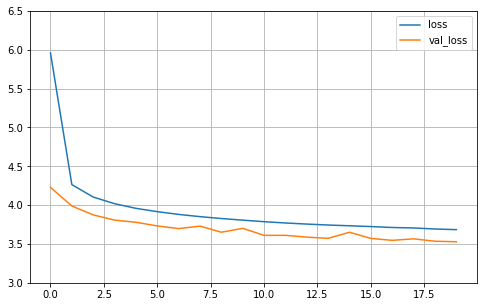

In [59]:
pd.DataFrame(historyC.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(3,6.5)
plt.show()

In [55]:
mse_test = modelC.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 79616.0938


In [60]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [62]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.